# SUMMER OLYMPICS DATA ANALYSIS ASSIGNMENT

## Importing the libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/content/Summer_olympics.csv")
data.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [2]:
data.shape

(31165, 9)

# Questions and Solutions:

## 1) In how many cities Summer Olympics is held so far? 

In [3]:
ans1 =len(data.City.unique())

print("The total number of cities where Summer Olympics is held :", ans1)

The total number of cities where Summer Olympics is held : 22


## 2) Which sport is having most number of Gold Medals so far? (Top 5)

In [4]:
print("Top 5 sports having most no. of gold medals so far:")
data[data['Medal']=='Gold']['Sport'].value_counts().head()

Top 5 sports having most no. of gold medals so far:


Aquatics      1421
Athletics     1215
Rowing         890
Gymnastics     820
Fencing        552
Name: Sport, dtype: int64

In [5]:
#2nd alternative
print("Top 5 sports having most no. of gold medals so far:")
data[data['Medal']=='Gold'].groupby('Sport')['Year'].count().sort_values(ascending = False).head()

Top 5 sports having most no. of gold medals so far:


Sport
Aquatics      1421
Athletics     1215
Rowing         890
Gymnastics     820
Fencing        552
Name: Year, dtype: int64

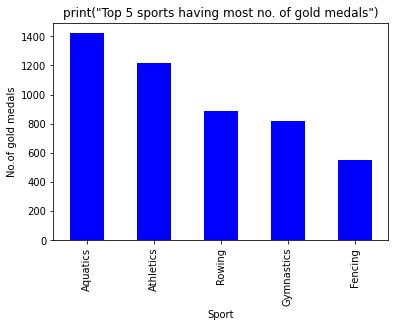

In [6]:
data[data['Medal']=='Gold'].groupby('Sport')['Year'].count().sort_values(ascending = False).head().plot(kind = 'bar', color = 'blue', ylabel = 'No.of gold medals', title = 'print("Top 5 sports having most no. of gold medals")')

## 3) Which sport is having most number of medals so far? (Top 5)

In [7]:
print("Top 5 sports having most no. of medals so far:")
data['Sport'].value_counts().head()

Top 5 sports having most no. of medals so far:


Aquatics      4170
Athletics     3638
Rowing        2667
Gymnastics    2307
Fencing       1613
Name: Sport, dtype: int64

In [8]:
#2nd alternative
print("Top 5 sports having most no. of gold medals so far:")
data.groupby('Sport').count()['Medal'].sort_values(ascending = False).head()

Top 5 sports having most no. of gold medals so far:


Sport
Aquatics      4170
Athletics     3638
Rowing        2667
Gymnastics    2307
Fencing       1613
Name: Medal, dtype: int64

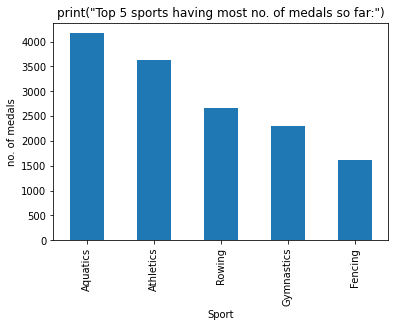

In [9]:
data.groupby('Sport').count()['Medal'].sort_values(ascending = False).head().plot(kind = 'bar', title = 'print("Top 5 sports having most no. of medals so far:")', ylabel = 'no. of medals')

## 4) Which player has won most number of medals? (Top 5)

In [10]:
print("Top 5 players who won most number of medals:")
data['Athlete'].value_counts().head()

Top 5 players who won most number of medals:


PHELPS, Michael         22
LATYNINA, Larisa        18
ANDRIANOV, Nikolay      15
SHAKHLIN, Boris         13
MANGIAROTTI, Edoardo    13
Name: Athlete, dtype: int64

In [11]:
#2nd alternative
print("Top 5 players who won most number of medals:")
data.groupby('Athlete').count()['Medal'].sort_values(ascending= False).head()

Top 5 players who won most number of medals:


Athlete
PHELPS, Michael         22
LATYNINA, Larisa        18
ANDRIANOV, Nikolay      15
MANGIAROTTI, Edoardo    13
SHAKHLIN, Boris         13
Name: Medal, dtype: int64

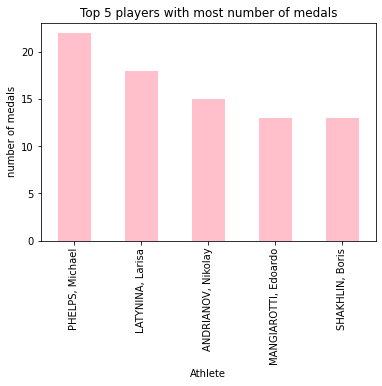

In [12]:
data.groupby('Athlete').count()['Medal'].sort_values(ascending= False).head().plot(kind = 'bar', color = 'pink', title = "Top 5 players with most number of medals", ylabel = "number of medals" )

## 5) Which player has won most number of Gold Medals? 

In [13]:
print("Top 5 players who won most number of gold medals:")
data[data['Medal']=='Gold']['Athlete'].value_counts().head()

Top 5 players who won most number of gold medals:


PHELPS, Michael     18
LATYNINA, Larisa     9
SPITZ, Mark          9
NURMI, Paavo         9
LEWIS, Carl          9
Name: Athlete, dtype: int64

In [14]:
#2nd alternative
print("Top 5 players who won most number of medals:")
data[data['Medal']=='Gold'].groupby('Athlete').count()['Medal'].sort_values(ascending= False).head()

Top 5 players who won most number of medals:


Athlete
PHELPS, Michael     18
NURMI, Paavo         9
SPITZ, Mark          9
LEWIS, Carl          9
LATYNINA, Larisa     9
Name: Medal, dtype: int64

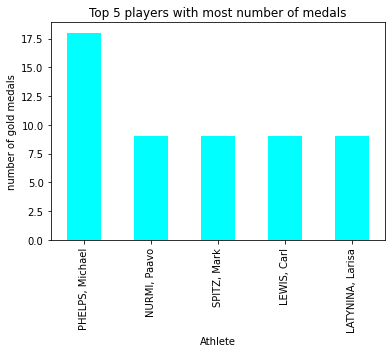

In [15]:
data[data['Medal']=='Gold'].groupby('Athlete').count()['Medal'].sort_values(ascending= False).head().plot(kind= 'bar', color = 'Cyan', title = "Top 5 players with most number of medals", ylabel ="number of gold medals")

## 6) In which year India won first Gold Medal in Summer Olympics?

In [16]:
df = data[data['Country']== 'IND']
ans = df[df['Medal']== 'Gold']['Year'].sort_values(ascending = True).head(1).to_string(index = False)

print("India won its first summer olympic gold medal in year '", ans[1:], "'.")

India won its first summer olympic gold medal in year ' 1928 '.


## 7) Which event is most popular in terms on number of players? (Top 5)

In [17]:
df7 = []

for event in data['Event'].unique():
    df_event = data[data['Event']==event]
    unique_athletes = len(df_event['Athlete'].unique())
    df7.append((event, unique_athletes))

# Dataframe with no. of unique Athletes per event: 
df7 = pd.DataFrame(df7, columns = ['Event', 'unique_Athletes'])

In [18]:
ans = df7.sort_values(by ='unique_Athletes', ascending = False).head()
ans = ans.set_index('Event')

print("Top 5 most popular events are:")
ans

Top 5 most popular events are:


,unique_Athletes
Event,
Football,1357
Hockey,1154
Team Competition,975
Eight With Coxswain (8+),828
Basketball,814


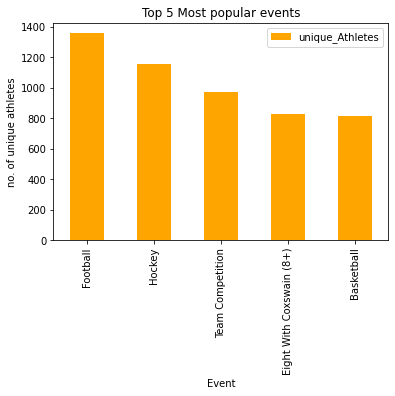

In [19]:
ans.plot(kind = 'bar', color = 'orange', ylabel = "no. of unique athletes", title = "Top 5 Most popular events")

## 8) Which sport is having most female Gold Medalists? (Top 5)

In [20]:
print("Top 5 sports having most number of female gold medalists:")
df8 =data[data['Gender']=='Women']
df8 = df8[df8['Medal']=='Gold']
df8.head()

df8['Sport'].value_counts().head()

Top 5 sports having most number of female gold medalists:


Aquatics      589
Athletics     389
Gymnastics    268
Rowing        217
Volleyball    166
Name: Sport, dtype: int64

In [21]:
#2nd alternative
print("Top 5 sports having most number of female gold medalists:")
df8.groupby('Sport')['Athlete'].count().sort_values(ascending = False).head()

Top 5 sports having most number of female gold medalists:


Sport
Aquatics      589
Athletics     389
Gymnastics    268
Rowing        217
Volleyball    166
Name: Athlete, dtype: int64

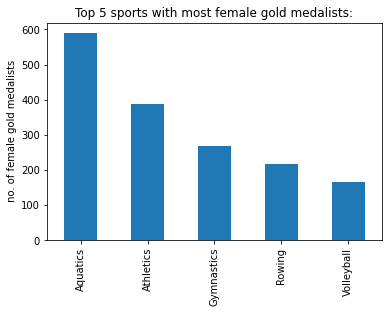

In [22]:
df8['Sport'].value_counts().head().plot(kind = 'bar', title = "Top 5 sports with most female gold medalists:", ylabel =' no. of female gold medalists' )